# Actividad 2 - Componentes principales - Indicadores económicos y sociales de 96 países
* Frida Cano Falcón - A01752953

## PARTE I
A partir de los datos sobre indicadores económicos y sociales de 96 países (datos: paises_mundo.csv Download paises_mundo.csv)  hacer una análisis de Componentes principales a partir de la  matriz de varianzas-covarianzas y otro a partir de la matriz de correlaciones, comparar los resultados y argumentar cuál es mejor según los resultados obtenidos.

## Conexión al directorio y librerías

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/MyDrive/7mo Semestre/EstadisticaAvanzada"
!ls

/content/drive/MyDrive/Semestres/7mo Semestre/EstadisticaAvanzada
Act1_NormalVariada_A01752953		     paises_mundo.csv
Act2_ComponentesPrincipales_A01752953.ipynb


In [25]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Cargar los datos a un dataframe
df = pd.read_csv('paises_mundo.csv')
df.head()

,CrecPobl,MortInf,PorcMujeres,PNB95,ProdElec,LinTelf,ConsAgua,PropBosq,PropDefor,ConsEner,EmisCO2
0,1.0,30,41,2199,3903,12,94,53,0.0,341,1.2
1,3.0,124,46,4422,955,6,57,19,0.7,89,0.5
2,4.3,21,13,133540,91019,96,497,1,0.0,4566,13.1
3,2.5,34,24,44609,19883,42,180,2,0.8,906,3.0
4,1.3,22,31,278431,65962,160,1043,22,0.1,1504,3.5


In [16]:
covariance_matrix = df.cov()
covariance_matrix_df = pd.DataFrame(covariance_matrix)
covariance_matrix_df

,CrecPobl,MortInf,PorcMujeres,PNB95,ProdElec,LinTelf,ConsAgua,PropBosq,PropDefor,ConsEner,EmisCO2
CrecPobl,1.538298,2.195026e+01,-6.078026,-8.933379e+04,-4.973964e+04,-1.369079e+02,-4.827092e+01,-3.887018,0.336197,-8.384169e+02,-1.137877
MortInf,21.950263,1.032859e+03,-9.249342,-2.269332e+06,-1.043435e+06,-4.381366e+03,-1.288211e+03,-14.663158,12.762961,-4.442568e+04,-94.855000
PorcMujeres,-6.078026,-9.249342e+00,76.983224,2.813114e+05,2.260248e+05,4.499750e+02,-1.568313e+03,65.178947,0.268059,2.855207e+02,-2.150132
PNB95,-89333.788772,-2.269332e+06,281311.418421,4.999786e+10,2.247791e+10,2.039550e+07,1.097481e+07,247431.122807,-58062.027632,1.415628e+08,250167.323509
ProdElec,-49739.635746,-1.043435e+06,226024.813487,2.247791e+10,1.821909e+10,7.583050e+06,1.399817e+07,70359.785965,-31803.401546,6.801296e+07,139277.888640
LinTelf,-136.907895,-4.381366e+03,449.975000,2.039550e+07,7.583050e+06,3.841247e+04,1.193110e+04,248.715789,-99.404605,3.426262e+05,638.570000
ConsAgua,-48.270921,-1.288211e+03,-1568.313487,1.097481e+07,1.399817e+07,1.193110e+04,3.301981e+05,-2220.757895,-67.437928,2.092242e+05,486.932763
PropBosq,-3.887018,-1.466316e+01,65.178947,2.474311e+05,7.035979e+04,2.487158e+02,-2.220758e+03,401.003509,2.625263,-5.153439e+03,-12.897193
PropDefor,0.336197,1.276296e+01,0.268059,-5.806203e+04,-3.180340e+04,-9.940461e+01,-6.743793e+01,2.625263,1.817253,-1.051522e+03,-2.632487
ConsEner,-838.416886,-4.442568e+04,285.520724,1.415628e+08,6.801296e+07,3.426262e+05,2.092242e+05,-5153.438596,-1051.521875,5.014395e+06,10286.159781


<Axes: >

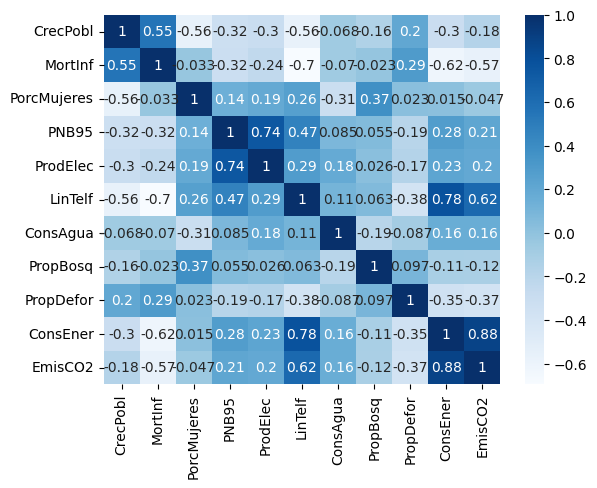

In [14]:
# Calcular la matriz de correlaciones
correlation_matrix = df.corr()
sb.heatmap(correlation_matrix, cmap = 'Blues', annot = True)

In [21]:
# Calcule los valores y vectores propios de cada matriz.
# Calcular los autovalores y autovectores Covarianza
eigenvalues_cov, eigenvectors_cov = np.linalg.eig(covariance_matrix)
# Calcular los autovalores y autovectores Correlación
eigenvalues_corr, eigenvectors_corr = np.linalg.eig(correlation_matrix)

[[-1.65816773e-06  4.70678460e-07 -1.26373574e-04 -1.92840781e-05
   5.53739707e-03  1.24345612e-02 -5.35908938e-03 -8.39081043e-02
   6.77835779e-02  9.87288738e-01 -1.15809096e-01]
 [-4.04813855e-05 -1.77425442e-05 -8.22538212e-03 -2.49325727e-03
   9.44030203e-02  9.91751509e-01 -2.25801958e-02 -7.89112785e-02
   1.63783592e-02 -2.09249092e-02  4.26487193e-04]
 [ 5.73909610e-06 -1.08454281e-05 -1.31814909e-04  5.53830717e-03
  -3.14036410e-02  8.55299154e-02  1.13648080e-01  9.85649803e-01
   1.46846382e-02  8.34432427e-02  8.24146535e-03]
 [ 8.88037597e-01  4.59763191e-01 -2.60220711e-03 -3.89358789e-04
   3.32740919e-04 -8.62100481e-06  7.56647696e-06  1.21724819e-05
   3.97146871e-07  2.72399679e-07  4.27445058e-07]
 [ 4.59763574e-01 -8.88040472e-01 -5.69489558e-04  1.09630500e-03
  -2.20781916e-04  1.95540800e-05 -1.54465759e-05 -2.55899806e-05
  -1.05947081e-06 -2.08685783e-07 -1.35388052e-06]
 [ 3.50434128e-04  4.01617912e-04  6.19424889e-02  7.64117441e-03
  -9.92140449e-01  

In [8]:
# Proporción de varianza explicada por cada componente
var_total =np.trace(covariance_matrix) # Varianza Total sum(diag(covariance_matrix))
prop_var = eigenvalues_cov / var_total
print("Proporción de varianza: ", prop_var)

Proporción de varianza:  [9.03454311e-01 9.64729842e-02 6.79580362e-05 4.55456679e-06
 1.78242937e-07 7.53091641e-09 5.31773802e-09 6.65776295e-10
 8.50288738e-11 6.98903513e-12 2.10784328e-11]


In [9]:
# Calcular la suma acumulativa
suma_acumulativa = np.cumsum(prop_var)
print(suma_acumulativa)

[0.90345431 0.9999273  0.99999525 0.99999981 0.99999999 0.99999999
 1.         1.         1.         1.         1.        ]


Para determinar qué componentes son los más importantes, observamos las proporciones de varianza explicada acumulada. Los componentes con una mayor proporción acumulada explican una mayor cantidad de variabilidad en los datos:

| CrecPobl | MortInf | PorcMujeres | PNB95 | ProdElec | LinTelf | ConsAgua | PropBosq | PropDefor | ConsEner | EmisCO2 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0.903 | 0.09 | 0.00006 | 0.00000455 | 0.00000178 | 0.0000000075 | 0.0000000053 | 0.0000000006 | 0.000000000085 | 0.0000000000069 | 0.00000000021 |

En este caso se reconoce que los componentes con mayor proporción acumulada son  CrecPobl y MortInf

### Matriz de correlaciones


In [23]:
# Proporción de varianza explicada por cada componente
corr_total =np.trace(correlation_matrix) # Varianza Total sum(diag(covariance_matrix))
prop_corr = eigenvalues_corr / corr_total
print("Proporción de correlación: ", prop_corr)

Proporción de correlación:  [0.36635264 0.17545381 0.12458283 0.00630533 0.01330256 0.01527895
 0.02970918 0.05193683 0.07859236 0.0721946  0.06629091]


In [11]:
# Calcular la suma acumulativa
suma_acumulativa = np.cumsum(prop_corr)
print(suma_acumulativa)

[0.36635264 0.54180645 0.66638928 0.67269462 0.68599718 0.70127613
 0.73098531 0.78292214 0.8615145  0.93370909 1.        ]


Para determinar qué componentes son los más importantes, observamos las proporciones de varianza explicada acumulada. Los componentes con una mayor proporción acumulada explican una mayor cantidad de variabilidad en los datos:

| CrecPobl | MortInf | PorcMujeres | PNB95 | ProdElec | LinTelf | ConsAgua | PropBosq | PropDefor | ConsEner | EmisCO2 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0.366 | 0.175 | 0.124 | 0.006 | 0.013 | 0.015 | 0.029 | 0.051 | 0.078 | 0.072 | 0.066 |

En este caso se reconoce que los componentes con mayor proporción acumulada son  CrecPobl y MortInf

## PARTE II
Obtenga las gráficas de respectivas con S (matriz de varianzas-covarianzas) y con R (matriz de correlaciones) de las dos primeras componentes e interprete los resultados en término de agrupación de variables (puede ayudar "índice de riqueza", "índice de ruralidad")

In [26]:
# Estandarizar los datos (importante antes de realizar PCA)
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(df[['CrecPobl','MortInf']])

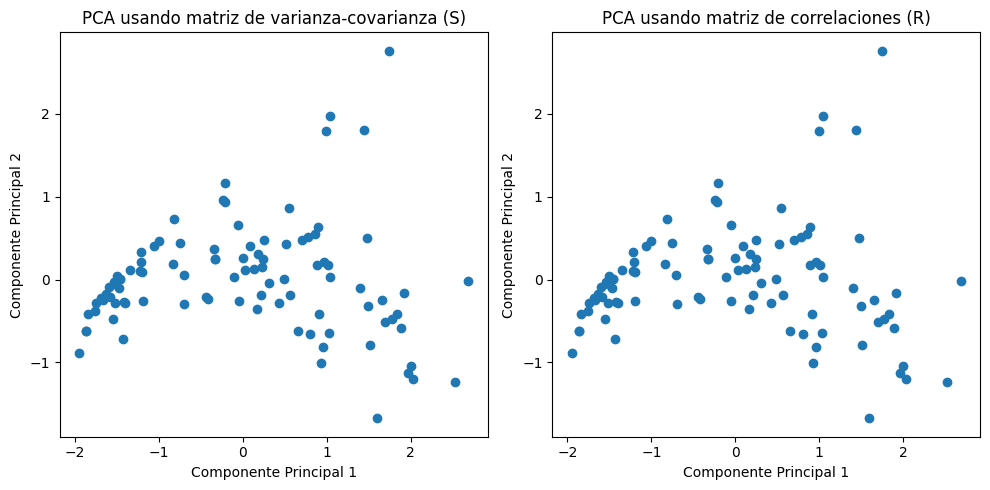

In [27]:
# Realizar PCA utilizando la matriz de varianza-covarianza (S)
pca_cov = PCA(n_components=2)
componentes_principales_cov = pca_cov.fit_transform(datos_escalados)

# Realizar PCA utilizando la matriz de correlaciones (R)
pca_cor = PCA(n_components=2)
componentes_principales_cor = pca_cor.fit_transform(datos_escalados)

# Graficar las dos primeras componentes principales usando S
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(componentes_principales_cov[:, 0], componentes_principales_cov[:, 1])
plt.title("PCA usando matriz de varianza-covarianza (S)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

# Graficar las dos primeras componentes principales usando R
plt.subplot(1, 2, 2)
plt.scatter(componentes_principales_cor[:, 0], componentes_principales_cor[:, 1])
plt.title("PCA usando matriz de correlaciones (R)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

plt.tight_layout()
plt.show()

## PARTE III
Explore los siguientes gráficos relativos al problema y Componentes Principales y dé una interpretación de cada gráfico.

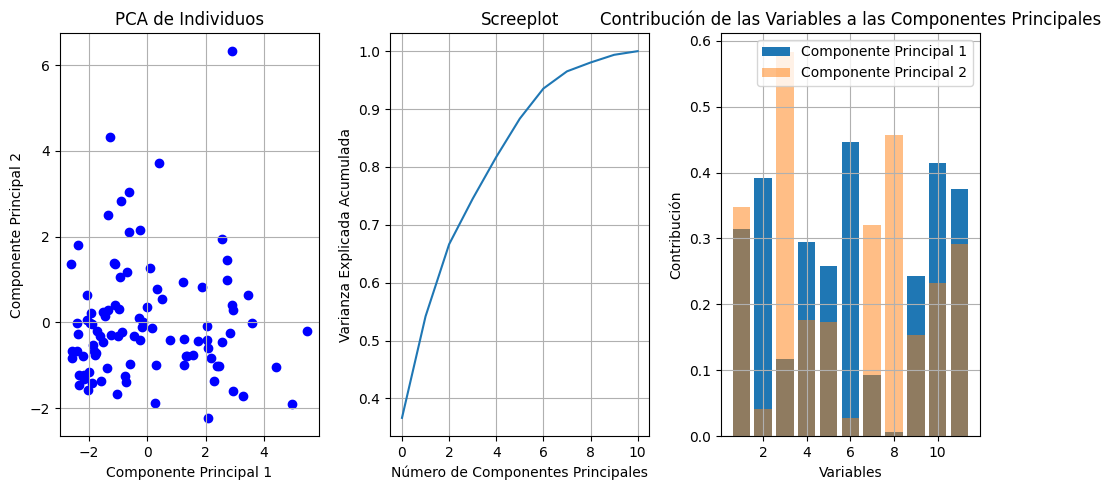

In [31]:
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(df)

# Realizar PCA
pca = PCA()
componentes_principales = pca.fit_transform(datos_escalados)

# Visualizar individuos (puedes usar la biblioteca matplotlib)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], c="blue")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA de Individuos")
plt.grid()

# Visualizar el screeplot (varianza explicada acumulada)
plt.subplot(1, 3, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Screeplot")
plt.grid()

# Calcular la contribución de las variables a las componentes principales
contribuciones = pca.components_

# Visualizar las contribuciones (reemplaza esto con tu propio código para graficar)
# Por ejemplo, puedes crear un gráfico de barras para mostrar las contribuciones de las variables a las componentes principales
variables = range(1, df.shape[1] + 1)
plt.subplot(1, 3, 3)
plt.bar(variables, np.abs(contribuciones[0]), label="Componente Principal 1")
plt.bar(variables, np.abs(contribuciones[1]), label="Componente Principal 2", alpha=0.5)
plt.xlabel("Variables")
plt.ylabel("Contribución")
plt.title("Contribución de las Variables a las Componentes Principales")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

De acuerdo a los gráficos obtenidos:

1. **Gráfico de dispersión de individuos (PCA de Individuos):**
   - Este gráfico muestra la proyección de los individuos (muestras o observaciones) en el espacio de las dos primeras componentes principales.
   - Cada punto en el gráfico representa un individuo.
   - El eje x representa el valor de la primera componente principal, mientras que el eje y representa el valor de la segunda componente principal.
   - Puedes observar cómo los individuos se agrupan o dispersan en función de su posición en el espacio de las componentes principales.
   - Esto puede ayudar a identificar patrones de similitud o diferencia entre las observaciones.

2. **Screeplot (Varianza Explicada Acumulada):**
   - Este gráfico muestra la varianza explicada acumulada en función del número de componentes principales.
   - Cada punto en el gráfico representa la proporción acumulada de varianza explicada a medida que se agregan más componentes principales.
   - El eje x muestra el número de componentes principales, y el eje y muestra la varianza explicada acumulada.
   - Puedes utilizar este gráfico para determinar cuántas componentes principales retener. Generalmente, se buscan "codos" en el gráfico para decidir el número apropiado de componentes principales a conservar. En este caso, parece que las dos primeras componentes explican la mayoría de la varianza.

3. **Gráfico de Contribución de Variables a las Componentes Principales:**
   - Este gráfico muestra la contribución de las variables originales a las dos primeras componentes principales.
   - Cada barra en el gráfico representa una variable, y la altura de la barra indica la magnitud de la contribución de esa variable a las componentes principales.
   - Puedes observar qué variables tienen las mayores contribuciones a cada componente principal.
   - Las variables con contribuciones altas (positivas o negativas) son las que más influyen en la dirección y magnitud de las componentes principales. Esto puede ayudarte a identificar qué variables están más relacionadas con las dimensiones subyacentes de tus datos.

En resumen, estos gráficos te proporcionan una visión global de cómo las componentes principales y las variables se relacionan en tu conjunto de datos.